In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Maximum Likelihood Estimation (MLE)

data(observation)이 주어졌을때 model의 parameter를 찾는 방법
$\rightarrow$ observation의 likelihood를 maximize하는 parameter를 찾는다

모든 data들은 $p(\mathbf{x}|\boldsymbol{\theta})$의 pdf를 가지는 모집단으로부터 추출한 iid (independent and identically distributed) sample이고 이들의 likelihood function은 다음과 같다

### likelihood function : $L(\boldsymbol{\theta}|D)=L(\theta_1,\dots,\theta_k|\mathbf{x}_1,\dots,\mathbf{x}_n)=p(D|\boldsymbol{\theta})=\Pi^n_{i=1} p(\mathbf{x}_i|\boldsymbol{\theta})$

where $D=\{\mathbf{x}_1,\dots \mathbf{x}_n\}$, $\boldsymbol{\theta}$ is the parameters to be estimated.

### 따라서 MLE는 $p(D|\boldsymbol{\theta})$를 maximize하는 $\hat{\boldsymbol{\theta}}$를 찾는 것

### $\rightarrow  \hat{\boldsymbol{\theta}}=\arg\max_\boldsymbol{\theta} p(D|\boldsymbol{\theta})$ 

$L(\boldsymbol{\theta})$를 maximizing하는 것은 $\ln L(\boldsymbol{\theta})$를 maximizing하는 것과 동일

또는,  $\ln L(\boldsymbol{\theta})$를 maximizing하는 것은  negative log-likelihood(NLL) = $-\ln L(\boldsymbol{\theta})$를 minimizing하는 것과 동일

### $l(\boldsymbol{\theta}) =\sum^n_{k=1} \ln p(\mathbf{x}_k|\boldsymbol{\theta})$
### $\nabla_\theta l(\boldsymbol{\theta}) =\sum^n_{k=1}\nabla_\theta \ln p(\mathbf{x}_k|\boldsymbol{\theta})=0$

### $\rightarrow$ 위 식을 만족하는 $\hat{\boldsymbol{\theta}}$를 찾는다

### [Exercise 1] - methods for estimating parameters

Maximum likelihood estimation(MLE)를 이용하여 linear model로 fitting하는 연습을 해본다.

In [413]:
# Choose the "true" parameters.
a0_true = 4.294
a1_true = -0.9594

sigma = 3

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0+ sigma*np.random.randn(N)
y = a1_true*x + a0_true
y +=yerr


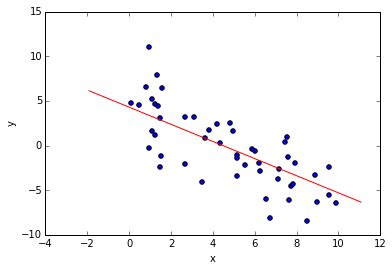

In [414]:
xx = np.arange(min(x)-2,max(x)+2)
yy = a1_true *xx + a0_true

plt.scatter(x, y)
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

실제 model은 빨간선으로 나타나있고, model로 부터 얻은 sample들은 파란점으로 나타나있다. 실제 우리가 얻는 데이터는 error $\epsilon$를 가질 수 있다.

$\mathbf{y}=\mathbf{X}\mathbf{a} + \epsilon$

$N(\epsilon_i; 0,\sigma^2) = \frac{1}{\sqrt{2\pi}\sigma} \exp (-\frac{(y_i-\mathbf{a}^T\mathbf{x_i})^2}{2\sigma^2})=\frac{1}{\sqrt{2\pi}\sigma} \exp (-\frac{(\mathbf{y}-\mathbf{X}\mathbf{a})^2}{2\sigma^2})$

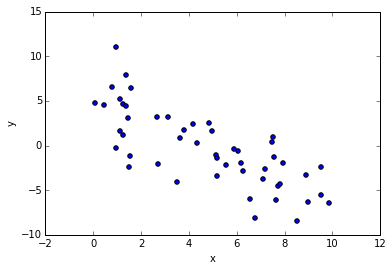

In [415]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

우리가 실제 model을 모른다고 가정했을때, sample들만 가지고 실제 model을 예측해보려 한다.

### --- Maximum Likelihood Estimator ($\mathbf{a}$) --- Linear Least Square Estimator

가장 쉬운 방법은 linear least square 를 이용하는 것이다. $\rightarrow$  $y=a_1x+a_0 $ line의 coefficient $a_0,a_1$을 찾는 것

NLL$(\boldsymbol{\theta})= -\sum_{i=1}^N \ln p(y_i|\mathbf{x}_i,\boldsymbol{\theta})$ =  $-\sum_{i=1}^N \ln [(\frac{1}{\sqrt{2\pi}\sigma}) \exp (-{\frac{(y_i - \mathbf{a}^T\mathbf{x}_i)^2}{2\sigma^2}})]$ = $-\sum_{i=1}^N \ln (\frac{1}{\sqrt{2\pi}\sigma}) - ({\frac{(y_i - \mathbf{a}^T\mathbf{x}_i)^2}{2\sigma^2}})$

= $\frac{N}{2}\ln ({2\pi\sigma^2}) +\frac{1}{{2\sigma^2}}\sum_{i=1}^N {{(y_i - \mathbf{a}^T\mathbf{x}_i)^2}}$ =  $\frac{N}{2}\ln ({2\pi\sigma^2}) +\frac{1}{{2\sigma^2}}R(\mathbf{a})$

$R(\mathbf{a}) = \sum \|y_i - \hat{y_i}\|^2 = \sum \|y_i - (a_1x_i+a_0))\|^2$

### $\mathbf{y}= \mathbf{X}\mathbf{a} \rightarrow \hat{\mathbf{a}}=\arg\min_\mathbf{a} \|\mathbf{y}-\mathbf{X}\mathbf{a}\|^2 $

$R(\mathbf{a}) = (\mathbf{y}-\mathbf{X}\mathbf{a})^T (\mathbf{y}-\mathbf{X}\mathbf{a})$ 
$=(\mathbf{y}^T-\mathbf{a}^T\mathbf{X}^T) (\mathbf{y}-\mathbf{X}\mathbf{a})$
$=\mathbf{y}^T\mathbf{y}-2\mathbf{y}^T\mathbf{X}\mathbf{a}  + \mathbf{y}^T\mathbf{X}^T\mathbf{X}\mathbf{y}$

$\frac{\partial R(\mathbf{a})}{\partial \mathbf{a}}=\frac{\partial}{\partial \mathbf{a}}=\mathbf{y}^T\mathbf{y}-2\mathbf{y}^T\mathbf{X}\mathbf{a}  + \mathbf{y}^T\mathbf{X}^T\mathbf{X}\mathbf{y}$ 
$=-2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\mathbf{a}=0$

### 따라서 linear least square loss를 이용하여 찾은 parameter $\mathbf{a}$는 
###  $ \mathbf{a} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T\mathbf{y}$ 

In [416]:
X = np.vstack((np.ones_like(x),x)).T

# 위의 식을 한번 작성해보세요
#a = 

a0_est_ls = a[0]
a1_est_ls = a[1]
print(a1_est_ls, a0_est_ls)

(-1.1056112049154476, 4.8982051420303234)


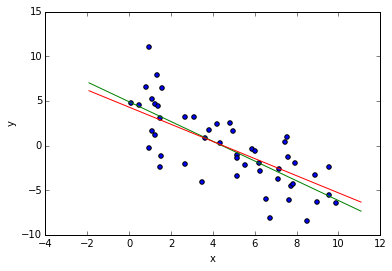

In [417]:
xxls = np.arange(min(x)-2,max(x)+2)
yyls = a1_est_ls *xxls + a0_est_ls

plt.scatter(x, y)
plt.plot(xxls,yyls,'g')
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

### --- Maximum Likelihood Estimator ($\sigma$)

NLL$(\boldsymbol{\theta})=-\frac{N}{2}\ln (\frac{1}{2\pi\sigma^2}) +\frac{1}{{2\sigma^2}}\sum_{i=1}^N {{(y_i - \mathbf{a}^T\mathbf{x}_i)^2}}$ =  $\frac{N}{2}\ln ({2\pi\sigma^2}) +\frac{1}{{2\sigma^2}}R(\mathbf{a})$

$\frac{\partial}{\partial\sigma^2}$NLL$(\boldsymbol{\theta})= \frac{\partial}{\partial\sigma^2}(\frac{N}{2}\ln ({2\pi\sigma^2}) +\frac{1}{{2\sigma^2}}R(\mathbf{a})) =\frac{N}{2\sigma^2} -\frac{1}{{2\sigma^4}}R(\mathbf{a}) =0$

 $\hat{\sigma}^2=\frac{1}{N}(\mathbf{y}-\mathbf{X}\mathbf{a})^T (\mathbf{y}-\mathbf{X}\mathbf{a})$ = $\frac{N-2}{N}$MSE

## Maximum likelihood estimation using gradient-based optimization

In [418]:
#   define a function to calculate the negative log likelihood
def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = (np.matmul(error.T,error))/n
        
    # negative log likelihood 식을 한번 작성해보세요
    nlogf =

    return nlogf

In [419]:
#   define my function which will return the objective function to be minimized
def myFunction(var,x,y):
    yGuess = (var[1]*x) + var[0]
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (f)

Optimization terminated successfully.
         Current function value: -3.338300
         Iterations: 9
         Function evaluations: 60
         Gradient evaluations: 15
(4.8982051602195522, -1.1056112335960759)


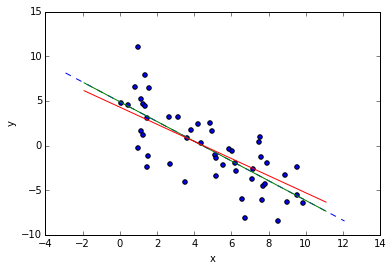

In [420]:
nvar = 2
var = np.zeros(nvar)
var[0] = 1.5
var[1] = -1.8

X = np.vstack((np.ones_like(x),x)).T

#   let's maximize the likelihood (minimize -1*max(likelihood)
from scipy.optimize import minimize
res = minimize(myFunction, var, args=(x,y), method='BFGS', options={'disp': True})
a0_est_mle, a1_est_mle = res["x"]
print(a0_est_mle ,a1_est_mle)

xxmle = np.arange(min(x)-3,max(x)+3)
yymle = a1_est_mle *xxmle + a0_est_mle

plt.scatter(x, y)
plt.plot(xxmle,yymle,'b--')
plt.plot(xxls,yyls,'g')
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

### [Exercise 2] - methods for estimating parameters

$a_2x^2 + a_1x +a_0=y$

In [425]:
# Choose the "true" parameters.
a2_true = 1.243
a1_true = -0.9594
a0_true = 4.294


sigma = 10

# Generate some synthetic data from the model.
N = 100
x = np.sort(10*np.random.rand(N))
yerr = 0+ sigma*np.random.randn(N)
y = a2_true*x**2 + a1_true*x + a0_true
y +=yerr


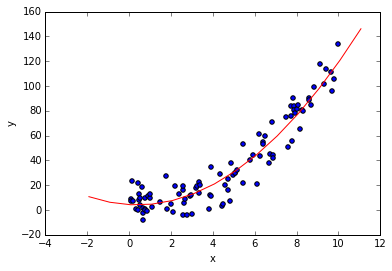

In [426]:
xx = np.arange(min(x)-2,max(x)+2)
yy = a2_true*xx**2 + a1_true*xx + a0_true

plt.scatter(x, y)
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

### 1) least square estimation 방법 이용

In [432]:
X = 

a = 

a0_est_ls = a[0]
a1_est_ls = a[1]
a2_est_ls = a[2]
print(a2_est_ls, a1_est_ls, a0_est_ls)

(1.5499409305608547, -3.9880536200429746, 8.8939605779393176)


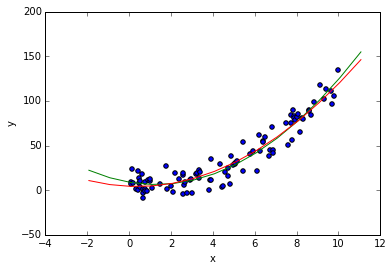

In [433]:
xxls = 
yyls = 

plt.scatter(x, y)
plt.plot(xxls,yyls,'g')
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')

### 2) MLE (gradient descent) 방법 이용

In [440]:
#   define a function to calculate the negative log likelihood
def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = (np.matmul(error.T,error))/n
        
    nlogf = 

    return nlogf

In [441]:
#   define my function which will return the objective function to be minimized
def myFunction(var,x,y):
    yGuess = 
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (f)

Optimization terminated successfully.
         Current function value: -0.508490
         Iterations: 18
         Function evaluations: 155
         Gradient evaluations: 31
(8.8940744353413468, -3.9880289618952487, 1.549935815947024)


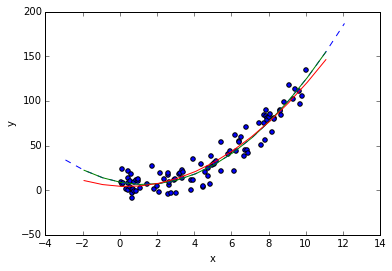

In [442]:
nvar = 3
var = np.zeros(nvar)
var[0] = 1.5
var[1] = -1.8
var[2] = 0.2

X = 

#   let's maximize the likelihood (minimize -1*max(likelihood)
from scipy.optimize import minimize
res = minimize(myFunction, var, args=(x,y), method='BFGS', options={'disp': True})
a0_est_mle, a1_est_mle, a2_est_mle= res["x"]
print(a0_est_mle ,a1_est_mle, a2_est_mle)

xxmle = 
yymle = 

plt.scatter(x, y)
plt.plot(xxmle,yymle,'b--')
plt.plot(xxls,yyls,'g')
plt.plot(xx,yy,'r')
plt.xlabel('x')
plt.ylabel('y')